In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [3]:
def autolabelint(ax,rects,fsize,col):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2 ,
            rect.get_height(),
            '%d' % int(rect.get_height()),
            ha='center',
            va='bottom',
            fontweight='bold',
            color = col,
            fontsize = ((fsize[1]+fsize[0])/2) + 5
           )

In [1]:
path = os.path.abspath(os.getcwd())

NameError: name 'os' is not defined

Se carga el test y el train usando el path relativo.

In [5]:
train = pd.read_csv(path + '/train.csv', low_memory=True)
test = pd.read_csv(path + '/test.csv', low_memory=True)

In [6]:
train.shape , test.shape

((7613, 5), (3263, 4))

Una relacion de datos de 2,33 a 1 entre el train y el test.

In [7]:
train.shape[0]/test.shape[0]
###### una relacion de datos de casi 2 y medio a 1

2.3331290223720504

Entendiendo los datos.

In [8]:
train.columns, test.columns

(Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object'),
 Index(['id', 'keyword', 'location', 'text'], dtype='object'))

In [9]:
train.dtypes ,  test.dtypes

(id           int64
 keyword     object
 location    object
 text        object
 target       int64
 dtype: object,
 id           int64
 keyword     object
 location    object
 text        object
 dtype: object)

In [10]:
train['target'][0:3]

0    1
1    1
2    1
Name: target, dtype: int64

In [11]:
train['target'].isna().any()

False

In [12]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [13]:
test['target'] = 2

In [14]:
totaldata = pd.concat([train,test])

In [15]:
totaldata.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

Hay campos nulos en los keywords y las locaciones.

In [16]:
totaldata['location'].isna().value_counts() , train['location'].isna().value_counts()

(False    7238
 True     3638
 Name: location, dtype: int64,
 False    5080
 True     2533
 Name: location, dtype: int64)

Hay muy pocos Nans en las Keywords.

In [17]:
totaldata['keyword'].isna().value_counts() , train['keyword'].isna().value_counts()

(False    10789
 True        87
 Name: keyword, dtype: int64,
 False    7552
 True       61
 Name: keyword, dtype: int64)

Los ids se basan en numeraciones simples

In [18]:
totaldata['id'][0:10] , totaldata['id'].max() , totaldata['id'].min()

(0     1
 1     4
 2     5
 3     6
 4     7
 5     8
 6    10
 7    13
 8    14
 9    15
 Name: id, dtype: int64,
 10875,
 0)

Analisis de los tweets

In [19]:
totaldata['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [20]:
s = totaldata['text'][1]

In [21]:
dict((charac,str(s).count(charac)) for charac in str(s))

{'1': 2,
 ' ': 34,
 'F': 1,
 'o': 4,
 'r': 6,
 'e': 14,
 's': 5,
 't': 9,
 'f': 3,
 'i': 5,
 'n': 4,
 'a': 11,
 'L': 1,
 'R': 1,
 'g': 1,
 'S': 1,
 'k': 2,
 '.': 4,
 'C': 1,
 'd': 4,
 '\n': 2,
 'H': 1,
 'b': 2,
 'u': 2,
 '#': 1,
 'h': 1,
 'q': 1,
 'c': 2,
 ',': 2,
 'N': 1,
 'm': 1,
 ':': 2,
 'x': 1,
 'y': 1,
 'p': 1,
 'j': 1}

In [22]:
strain = train['text'].str.cat()

In [23]:
tfalse = train.loc[train['target'] == 0]
ttrue = train.loc[train['target'] == 1]

In [24]:
stfalse = tfalse['text'].str.cat()
sttrue = ttrue['text'].str.cat()

In [25]:
asciiall = ' !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~'

In [26]:
chart = pd.DataFrame((char,sttrue.count(char)) for char in asciiall).set_index(0).transpose()

In [27]:
charf = pd.DataFrame((char,stfalse.count(char)) for char in asciiall).set_index(0).transpose()

In [28]:
charf

,,!,"""",#,$,%,&,',(,),...,u,v,w,x,y,z,{,|,},~
1,59589,843,0,1700,32,19,293,2063,207,229,...,8906,3086,5208,992,6535,830,1,99,2,17


In [29]:
chart

,,!,"""",#,$,%,&,',(,),...,u,v,w,x,y,z,{,|,},~
1,46452,330,0,1703,12,27,164,1094,142,144,...,6629,2768,3754,885,4167,686,2,53,2,20


In [30]:
charf = charf.transpose().reset_index()
chart = chart.transpose().reset_index()

In [31]:
charf.columns = ['char','cant']
chart.columns = ['char','cant']

Se filtran los caracteres con pocas ocurrencias

In [32]:
charf['cant'].mean()/100

43.56031578947369

In [33]:
charf = charf.loc[charf['cant']>(charf['cant'].mean()/100)]

In [34]:
chart = chart.loc[chart['cant']>(chart['cant'].mean()/100)]

In [35]:
charf

,char,cant
0,,59589
1,!,843
3,#,1700
6,&,293
7,',2063
...,...,...
87,w,5208
88,x,992
89,y,6535
90,z,830


In [36]:
chart

,char,cant
0,,46452
1,!,330
3,#,1703
6,&,164
7,',1094
...,...,...
87,w,3754
88,x,885
89,y,4167
90,z,686


In [37]:
caracteres = charf.merge(chart, on='char',how='left').fillna(0)

In [38]:
caracteres.columns = ['char','cantf','cantt']

In [39]:
caracteres.head(10)

,char,cantf,cantt
0,,59589,46452.0
1,!,843,330.0
2,#,1700,1703.0
3,&,293,164.0
4,',2063,1094.0
5,(,207,142.0
6,),229,144.0
7,*,121,58.0
8,+,57,0.0
9,-,810,943.0


Cantidad de tweets Verdaderos VS Falsos

In [40]:
ttrue.shape[0],tfalse.shape[0]

(3271, 4342)

In [41]:
toy1 = ttrue.shape[0],tfalse.shape[0]
tox = ['Verdaderos', 'Falsos']

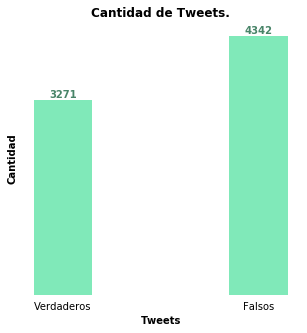

In [42]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
rects = ax.bar(tox,toy1,color='#80E9B9',width=0.3)
ax.set_title('Cantidad de Tweets.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'#488468')

# Analisis de caracteres en los tweets
 


Cantidad de caracteres totales (sacando los espacios) en tweets verdaderos y falsos

In [43]:
toy = (len(sttrue.replace(' ','')),len(stfalse.replace(' ','')))

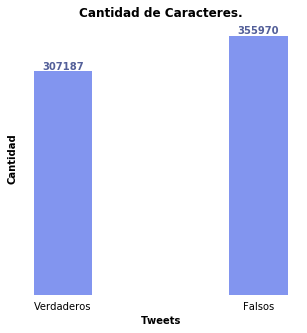

In [44]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
rects = ax.bar(tox,toy,color='#8295EF',width=0.3)
ax.set_title('Cantidad de Caracteres.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'#535F99')

Se puede ver que las publicaciones verdaderas usan mayor cantidad de caracteres (sacando los espacios en blanco) que las falsas 

In [45]:
prom = int(int(toy[0])/int(toy1[0])),int(int(toy[1])/int(toy1[1]))
prom

(93, 81)

Hay que tener en cuenta que la cantidad de caracteres a lo largo del tiempo en la red social fue cambiando.

In [46]:
tmaxmin = ttrue['text'].apply(len).max() , ttrue['text'].apply(len).min()
tmaxmin

(151, 14)

In [47]:
fmaxmin = tfalse['text'].apply(len).max() , tfalse['text'].apply(len).min()
fmaxmin

(157, 7)

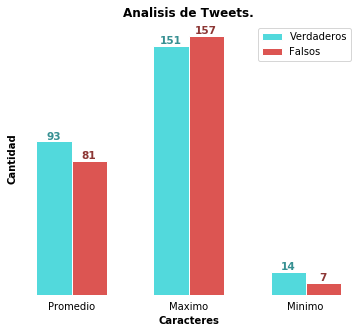

In [48]:
fsize = (6,5)
fig, ax = plt.subplots(figsize=fsize)
bars1 = [prom[0],tmaxmin[0],tmaxmin[1]]
bars2 = [prom[1],fmaxmin[0],fmaxmin[1]]
r1 = np.arange(len(bars1))
r2 = [x + 0.3 for x in r1]
rects1 = ax.bar(r1, bars1, color='#52D9DC', width=0.3, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.3, edgecolor='white', label='Falsos')

ax.set_title('Analisis de Tweets.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Caracteres',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
plt.xlabel('Caracteres', fontweight='bold')
plt.xticks([r+0.15 for r in range(len(bars1))], ['Promedio', 'Maximo', 'Minimo'])
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
plt.legend()

In [49]:
ttox = ttrue['text'].apply(len).value_counts().sort_index()

In [50]:
ftox = tfalse['text'].apply(len).value_counts().sort_index()

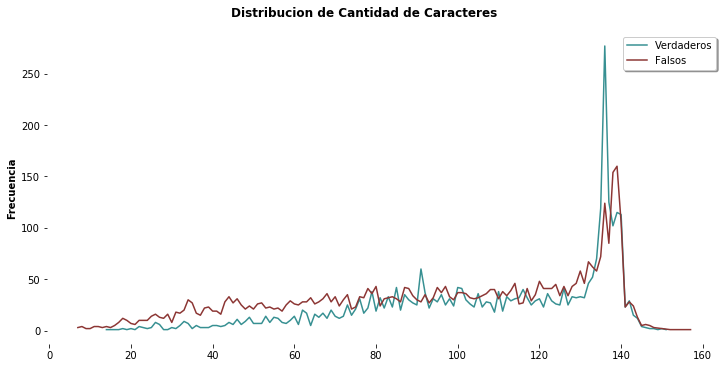

In [51]:
fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
fig.suptitle('Distribucion de Cantidad de Caracteres',fontweight='bold')
ax.plot(ttox.index,ttox.values, color='#379092', label = 'Verdaderos')
ax.plot(ftox.index,ftox.values, color='#8C3634', label = 'Falsos')
legend = ax.legend(loc='best', shadow=True)
#####################################################################################
ax.set_ylabel('Frecuencia',fontweight='bold')
#####################################################################################
plt.show()

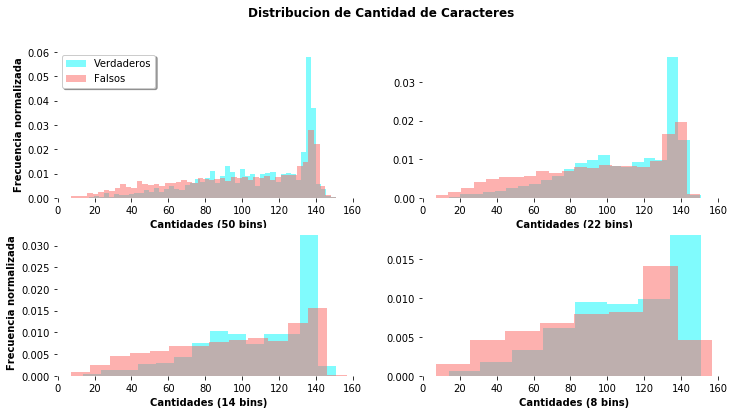

In [52]:
fsize = (12,6)
fig, axs = plt.subplots(2,2,figsize=fsize)
axs[0,0].hist(ttrue['text'].apply(len),alpha=0.8,bins=50, color='#61FAFD', label = 'Verdaderos',density=True)
axs[0,0].hist(tfalse['text'].apply(len),alpha=0.5,bins=50, color='#FD6461', label = 'Falsos',density=True)
axs[0,1].hist(ttrue['text'].apply(len),alpha=0.8,bins=22, color='#61FAFD', label = 'Verdaderos',density=True)
axs[0,1].hist(tfalse['text'].apply(len),alpha=0.5,bins=22, color='#FD6461', label = 'Falsos',density=True)
axs[1,0].hist(ttrue['text'].apply(len),alpha=0.8,bins=14, color='#61FAFD', label = 'Verdaderos',density=True)
axs[1,0].hist(tfalse['text'].apply(len),alpha=0.5,bins=14, color='#FD6461', label = 'Falsos',density=True)
axs[1,1].hist(ttrue['text'].apply(len),alpha=0.8,bins=8, color='#61FAFD', label = 'Verdaderos',density=True)
axs[1,1].hist(tfalse['text'].apply(len),alpha=0.5,bins=8, color='#FD6461', label = 'Falsos',density=True)
legend = axs[0,0].legend(loc='best', shadow=True)
#legend.get_frame().set_facecolor('C0')
#####################################################################################
fig.suptitle('Distribucion de Cantidad de Caracteres',fontweight='bold')
axs[0,0].set_ylabel('Frecuencia normalizada',fontweight='bold')
axs[1,0].set_ylabel('Frecuencia normalizada',fontweight='bold')
axs[0,0].set_xlabel('Cantidades (50 bins)',fontweight='bold')
axs[0,1].set_xlabel('Cantidades (22 bins)',fontweight='bold')
axs[1,0].set_xlabel('Cantidades (14 bins)',fontweight='bold')
axs[1,1].set_xlabel('Cantidades (8 bins)',fontweight='bold')
#####################################################################################
ax.xaxis.set_ticks_position('none')
plt.show()

In [53]:
asciiletters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
asciinumbers = '0123456789'

In [54]:
total = len(sttrue),len(stfalse)

In [55]:
numberst = pd.DataFrame((char,sttrue.count(char)) for char in asciinumbers).set_index(0)
numbersf = pd.DataFrame((char,stfalse.count(char)) for char in asciinumbers).set_index(0)

In [56]:
lettersf = pd.DataFrame((char,stfalse.count(char)) for char in asciiletters).set_index(0)
letterst = pd.DataFrame((char,sttrue.count(char)) for char in asciiletters).set_index(0)

In [57]:
spacet =  sttrue.count(' ')
spacef =  stfalse.count(' ')

In [58]:
space = (sttrue.count(' ')*100)/total[0], (stfalse.count(' ')*100)/total[1]
letters = (letterst.sum()[1]*100)/total[0],(lettersf.sum()[1]*100)/total[1]
numbers = (numberst.sum()[1]*100)/total[0],(numbersf.sum()[1]*100)/total[1]
nonalfa = 100 - (space[0]+letters[0]+numbers[0]) , 100 - (space[1]+letters[1]+numbers[1])

In [59]:
space , letters , numbers, nonalfa

((13.135429067495384, 14.339480073828264),
 (77.0279861666841, 76.98882709795721),
 (2.439493381668877, 1.661857882996157),
 (7.397091384151636, 7.009834945218358))

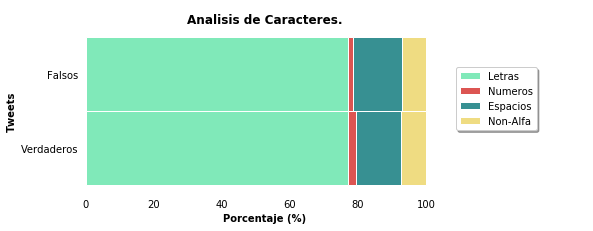

In [60]:
fsize = (8,3)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
barWidth = 1
ax.barh(['Verdaderos','Falsos'], letters, color='#80E9B9', height = barWidth, edgecolor='white', label="Letras")
ax.barh(['Verdaderos','Falsos'], numbers, left=letters, color='#DC5552', height = barWidth, edgecolor='white', label="Numeros")
ax.barh(['Verdaderos','Falsos'], space, left=[i+j for i,j in zip(letters, numbers)], height = barWidth, color='#379092', edgecolor='white', label="Espacios")
ax.barh(['Verdaderos','Falsos'], nonalfa, left=[i+j+k for i,j,k in zip(letters, numbers, space)], height = barWidth, color='#EFDC82', edgecolor='white', label="Non-Alfa")
ax.set_title('Analisis de Caracteres.',fontweight='bold')
ax.set_xlabel('Porcentaje (%)',fontweight='bold')
ax.set_ylabel('Tweets',fontweight='bold')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

In [61]:
charf15 = charf.sort_values(by='cant',ascending = False)[0:14]
chart15 = chart.sort_values(by='cant',ascending = False)[0:14]

In [62]:
chart15['cant'] = chart15['cant'].apply(lambda x: (x*100)/total[0])
charf15['cant'] = charf15['cant'].apply(lambda x: (x*100)/total[1])

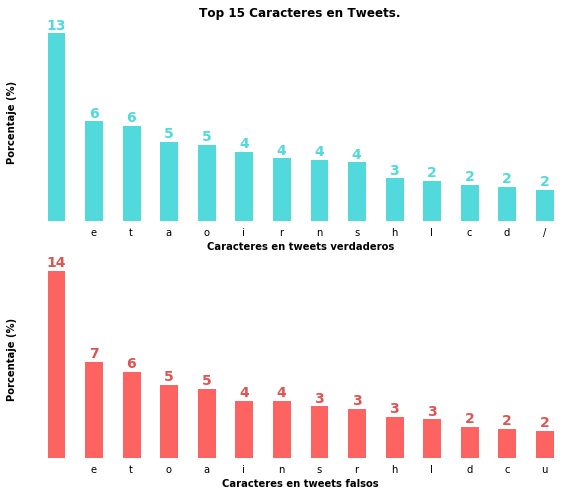

In [63]:
fsize = (10,8)
fig, axs = plt.subplots(2,1,figsize=fsize)
rects1 = axs[0].bar(chart15['char'].tolist(), chart15['cant'].tolist() , color='#52D9DC', width=0.5, edgecolor='white', label='Verdaderos')
rects2 = axs[1].bar(charf15['char'].tolist(), charf15['cant'].tolist() , color='#FD6461', width=0.5, edgecolor='white', label='Falsos')
axs[0].set_title('Top 15 Caracteres en Tweets.',fontweight='bold')
axs[0].set_ylabel('Porcentaje (%)',fontweight='bold')
axs[1].set_xlabel('Caracteres en tweets falsos',fontweight='bold')
axs[0].set_yticks([])
axs[0].xaxis.set_ticks_position('none')
axs[1].set_yticks([])
axs[1].xaxis.set_ticks_position('none')
axs[0].set_xlabel('Caracteres en tweets verdaderos',fontweight='bold')
axs[1].set_ylabel('Porcentaje (%)',fontweight='bold')
autolabelint(axs[0],rects1,fsize,'#52D9DC')
autolabelint(axs[1],rects2,fsize,'#DC5552')

In [64]:
toplot = chart.merge(charf,on='char').sort_values(by='cant_x',ascending=False)[1:20]

In [65]:
toplot.shape

(19, 3)

In [66]:
toplot['cant_x'] = (toplot['cant_x']*100)/total[0]
toplot['cant_y'] = (toplot['cant_y']*100)/total[1]

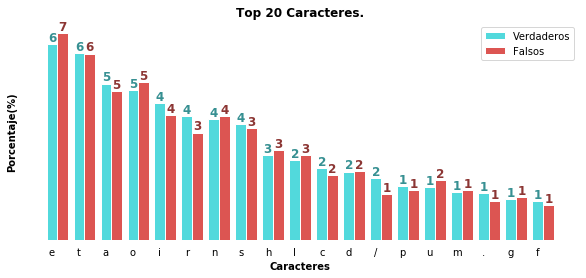

In [67]:
fsize = (10,4)
fig, ax = plt.subplots(figsize=fsize)
bars1 = toplot['cant_x'].tolist()
bars2 = toplot['cant_y'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.bar(toplot['char'].tolist(), bars1, color='#52D9DC', width=0.4, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.4, edgecolor='white', label='Falsos')
ax.set_title('Top 20 Caracteres.',fontweight='bold')
ax.set_ylabel('Porcentaje(%)',fontweight='bold')
ax.set_xlabel('Caracteres',fontweight='bold')
ax.set_yticks([])
ax.set_xticks(toplot['char'].tolist())
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
#ax.set_xticklabels(toplot['char'].tolist())
plt.legend()

### Conclusion sobre los caracteres:
1. La cantidad de espacios en blanco en los tweets falsos es levemente superior.
2. La distribucion de caracteres muestra que los tweets falsos tienden a ser mas cortos mientras que a partir de cierta cantidad la frecuencia normalizada de verdaderos aumenta y supera a los falsos. (Ver distribucion)

# NLP

In [68]:
import nltk
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [69]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /home/pcsor/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [70]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pcsor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
stfalse = tfalse['text'].str.cat(sep=' ')
sttrue = ttrue['text'].str.cat(sep=' ')

In [72]:
stfalse_file = open("stfalse.txt", "r")
sttrue_file = open("sttrue.txt", "r")

In [73]:
stfalse = stfalse_file.read()
sttrue = sttrue_file.read()

In [74]:
len(stfalse) , len(sttrue)

(419900, 356909)

In [75]:
falsetokens = nltk.wordpunct_tokenize(stfalse)
truetokens = nltk.wordpunct_tokenize(sttrue)

In [76]:
truetokens

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all',
 'Forest',
 'fire',
 'near',
 'La',
 'Ronge',
 'Sask',
 '.',
 'Canada',
 'All',
 'residents',
 'asked',
 'to',
 "'",
 'shelter',
 'in',
 'place',
 "'",
 'are',
 'being',
 'notified',
 'by',
 'officers',
 '.',
 'No',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected',
 '13',
 ',',
 '000',
 'people',
 'receive',
 '#',
 'wildfires',
 'evacuation',
 'orders',
 'in',
 'California',
 'Just',
 'got',
 'sent',
 'this',
 'photo',
 'from',
 'Ruby',
 '#',
 'Alaska',
 'as',
 'smoke',
 'from',
 '#',
 'wildfires',
 'pours',
 'into',
 'a',
 'school',
 '#',
 'RockyFire',
 'Update',
 '=>',
 'California',
 'Hwy',
 '.',
 '20',
 'closed',
 'in',
 'both',
 'directions',
 'due',
 'to',
 'Lake',
 'County',
 'fire',
 '-',
 '#',
 'CAfire',
 '#',
 'wildfires',
 '#',
 'flood',
 '#',
 'disaster',
 'Heavy',
 'rain',
 'causes',
 'flash',
 'flooding',

In [79]:
truetext = nltk.Text(truetokens)
falsetext = nltk.Text(falsetokens)

In [90]:
truetext[100:200]

['#',
 'disaster',
 'Heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'of',
 'streets',
 'in',
 'Manitou',
 ',',
 'Colorado',
 'Springs',
 'areas',
 'I',
 "'",
 'm',
 'on',
 'top',
 'of',
 'the',
 'hill',
 'and',
 'I',
 'can',
 'see',
 'a',
 'fire',
 'in',
 'the',
 'woods',
 '...',
 'There',
 "'",
 's',
 'an',
 'emergency',
 'evacuation',
 'happening',
 'now',
 'in',
 'the',
 'building',
 'across',
 'the',
 'street',
 'I',
 "'",
 'm',
 'afraid',
 'that',
 'the',
 'tornado',
 'is',
 'coming',
 'to',
 'our',
 'area',
 '...',
 'Three',
 'people',
 'died',
 'from',
 'the',
 'heat',
 'wave',
 'so',
 'far',
 'Haha',
 'South',
 'Tampa',
 'is',
 'getting',
 'flooded',
 'hah',
 '-',
 'WAIT',
 'A',
 'SECOND',
 'I',
 'LIVE',
 'IN',
 'SOUTH',
 'TAMPA',
 'WHAT',
 'AM',
 'I',
 'GONNA',
 'DO',
 'WHAT',
 'AM',
 'I',
 'GONNA',
 'DO',
 'FVCK',
 '#',
 'flooding',
 '#',
 'raining']

In [80]:
twords=[word.lower() for word in truetext if word.isalpha()]
fwords=[word.lower() for word in falsetext if word.isalpha()]

In [84]:
emotions = ['love','fear','sad','trust','surprise','horror','happy','shame','pity','anger','hate','calm']
conjunctions = ['but','only','unlike','however','rather','yet','nevertheless','wichever','instead']

In [85]:
tvocab = sorted(set(twords))
fvocab = sorted(set(fwords))

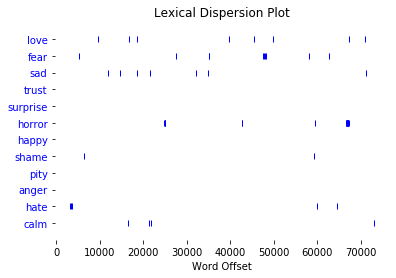

In [86]:
truetext.dispersion_plot(emotions)

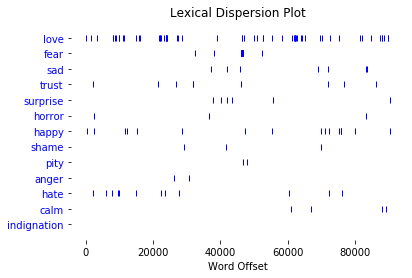

In [421]:
falsetext.dispersion_plot(emotions)

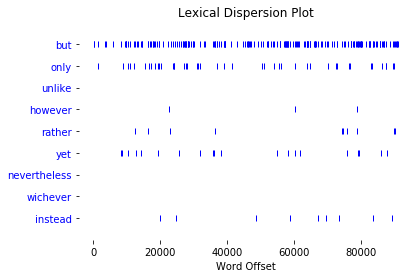

In [88]:
falsetext.dispersion_plot(conjunctions)

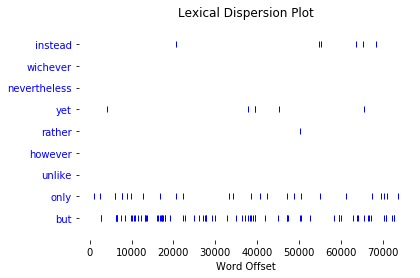

In [89]:
truetext.dispersion_plot(conjunctions)

In [87]:
ftagged = pd.DataFrame(nltk.pos_tag(falsetext),columns=['word','tag'])
ttagged = pd.DataFrame(nltk.pos_tag(truetext),columns=['word','tag'])

In [429]:
words

{'sporadicalness',
 'aquilino',
 'irreprehensibleness',
 'hendecoic',
 'yawnproof',
 'cholesterol',
 'spartle',
 'untarrying',
 'wisen',
 'chromocollotype',
 'transubstantiationalist',
 'justifying',
 'renegotiable',
 'diarticular',
 'magnoferrite',
 'saccharamide',
 'caperingly',
 'suitor',
 'reinvest',
 'assoilment',
 'psychosynthesis',
 'dendroclastic',
 'ooziness',
 'pharyngoamygdalitis',
 'unknocked',
 'poetling',
 'isoxime',
 'Liberalia',
 'itchingly',
 'furoid',
 'nematogenic',
 'easement',
 'plenilunary',
 'Russophobia',
 'supersize',
 'unproportionately',
 'taillessness',
 'gemshorn',
 'genuinely',
 'paradental',
 'retaliatory',
 'ampasimenite',
 'risque',
 'heathenish',
 'polycarpy',
 'Geaster',
 'unpaintedly',
 'hemometry',
 'insolency',
 'septa',
 'clericism',
 'Cynthius',
 'sauterelle',
 'shearbill',
 'palish',
 'shopland',
 'unease',
 'unendorsable',
 'rhabdoid',
 'intralaryngeally',
 'camused',
 'monoamino',
 'beauship',
 'lockram',
 'incitability',
 'Neuropteroidea',
 '